題目 : 安寧照護   作者 : 羅為禾    

載入需要的程式庫及模組

matplotlib : 作圖

pandas : 分析、標準化、處理資料的程式庫

numpy : 整合其他低階語言的模組、處理龐大維度資料

In [2]:
# import libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

一、針對藥品名稱進行網路爬蟲，擷取縮寫、全名的表格

載入所需的套件

request : 利用該模組從網頁伺服器下載指定資料

BeautifulSoup : 從HTML抓取Data的程式庫

In [3]:
# import libraries
import requests
from bs4 import BeautifulSoup as bs
# 針對維基百科列出的英文縮寫表進行爬蟲
# 從網站去抓取html
URL = "https://en.wikipedia.org/wiki/List_of_medical_abbreviations"
html = requests.get(URL).text
# 利用BeautifulSoup和lxml去解讀html
soup = bs (html,'lxml')
# 用pandas的內建將解讀完成的表格讀進去
tables = pd.read_html(URL)
# 選取目標 (第幾個table,第幾個位置開始)
goal_table = tables[2].iloc[1:]
print (goal_table)

         0                                       1                    2
1      ABG                      arterial blood gas                  NaN
2      ACE           angiotensin-converting enzyme                  NaN
3     ACTH             adrenocorticotropic hormone                  NaN
4      ADH                    antidiuretic hormone                  NaN
5      AED        automated external defibrillator                  NaN
6     AIDS      acquired immunodeficiency syndrome                  NaN
7      ALP                    alkaline phosphatase                  NaN
8      ALT                alanine aminotransferase  old version is SGPT
9      ASA                    acetylsalicylic acid              aspirin
10     AST              aspartate aminotransferase  old version is SGOT
11     ATP                  adenosine triphosphate                  NaN
12     BCG                 bacille Calmette-Guérin                  NaN
13     bid                           2 times a day              

二、初步理解資料

(1) 針對照會時間計算常用來處理資料的一些值 : 平均數、四分位數、最大值最小值、全距

(2) 

In [4]:
# reading files
# 用pandas讀取照會時間的表，並從時間長排到時間短
care_day = pd.read_csv('days.csv')
##print (care_day)
#讓資料由大到小排序
sort_care_day = care_day.sort_values(by=['x'], ascending = False)
##print(sort_care_day)
sort_care_day.head()

,Unnamed: 0,x
118,119,210.0
92,93,128.0
105,106,127.0
25,26,107.0
73,74,105.0


針對病人存亡時間的數據做一些基本的處理

In [5]:
# 設一些變數去計算平均值、分別計算病患在存活時間上資料有效無效各有幾人、陣列去供資料寫入
accumulate = 0
count1 = 0
count2 = 0
temp = 0
day_array = []
analyze = []
index = []
##print (care_day)
# 將原本的資料days去掉header後另存新檔為days_without_header.csv
file = open('days_without_header.csv')
# 讀入資料後看第二縱列去計算存活時間的平均值
for line in file :
    ##print (line)
    # csv檔原先預設以','做分隔
    array = line.split(",")
    ##print (array[1])
    # 因為有資料上面寫Na,為了避免error使用try and except
    try :
        temp = int(array[1])
        accumulate += temp
        count1 += 1
        # 將資料存入新陣列
        day_array.append(temp) 
        index.append(int(array[0]))
    except :
        accumulate = accumulate
        count2 += 1
        # 因為Na無法加入計算所以暫時先把顯示Na的病患資料拿掉
        ##day_array.append(-1)
average = accumulate/count1
# 用list內建功能去排序
sort_day = day_array
print (day_array)
print ('average :',average)
# 使用np去計算四分位數
analyze = np.percentile(day_array, (25, 50, 75), interpolation='midpoint')
print ('first quartile :',analyze[0])
print ('second quartile :',analyze[1])
print ('third quartile :',analyze[2])
print ('longest :',day_array[118])
print ('shortest :',day_array[0])
print ('range :',day_array[118]-day_array[0])
print ('valid patients :',count1)
print ('invalid patients :',count2)

[46, 34, 12, 60, 14, 31, 8, 34, 34, 20, 8, 10, 66, 4, 24, 21, 62, 38, 10, 19, 27, 14, 32, 16, 107, 27, 41, 49, 27, 12, 13, 15, 35, 37, 30, 14, 26, 82, 20, 0, 17, 16, 31, 1, 17, 14, 87, 53, 14, 25, 79, 25, 22, 14, 12, 19, 40, 2, 49, 44, 43, 43, 48, 35, 28, 60, 54, 24, 26, 6, 31, 18, 105, 36, 16, 21, 17, 22, 19, 3, 45, 14, 43, 16, 18, 61, 9, 17, 27, 12, 13, 128, 7, 19, 16, 10, 29, 38, 16, 14, 27, 19, 1, 8, 127, 15, 35, 10, 10, 16, 4, 22, 22, 210, 27, 25, 6, 17, 31]
average : 30.243697478991596
first quartile : 14.0
second quartile : 22.0
third quartile : 35.5
longest : 31
shortest : 46
range : -15
valid patients : 119
invalid patients : 5


針對病患的編號與照護時間做散步圖

[46, 34, 12, 60, 14, 31, 8, 34, 34, 20, 8, 10, 66, 4, 24, 21, 62, 38, 10, 19, 27, 14, 32, 16, 107, 27, 41, 49, 27, 12, 13, 15, 35, 37, 30, 14, 26, 82, 20, 0, 17, 16, 31, 1, 17, 14, 87, 53, 14, 25, 79, 25, 22, 14, 12, 19, 40, 2, 49, 44, 43, 43, 48, 35, 28, 60, 54, 24, 26, 6, 31, 18, 105, 36, 16, 21, 17, 22, 19, 3, 45, 14, 43, 16, 18, 61, 9, 17, 27, 12, 13, 128, 7, 19, 16, 10, 29, 38, 16, 14, 27, 19, 1, 8, 127, 15, 35, 10, 10, 16, 4, 22, 22, 210, 27, 25, 6, 17, 31]


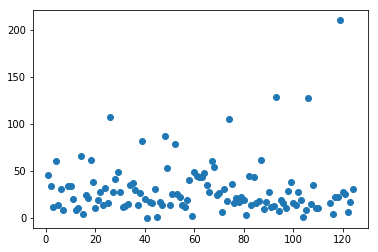

In [6]:
print(day_array)
plt.scatter(index,day_array)
plt.show()

將病患依據存活時間分為早晚兩個階段

In [7]:
# 設三個list分別儲存全部的、存活時間短的、存活時間長的病患
all = []
short = []
long = []
# 119為上述有效病患
for i in range(0,119) :
    all.append([index[i],day_array[i]])
# 取出all當中存活天數的數字，為了要用split先將list轉換成str，再以float比較大小
for i in all :
    str_i = str(i)
    temp1 = str_i.split(',')
    temp2 = temp1[1].split(']')
    if float(temp2[0]) > average :
        long.append(i)
    else :
        short.append(i)
print (short)
print (long)

[[3, 12], [5, 14], [7, 8], [11, 20], [12, 8], [13, 10], [15, 4], [16, 24], [17, 21], [20, 10], [21, 19], [22, 27], [23, 14], [25, 16], [27, 27], [30, 27], [31, 12], [32, 13], [33, 15], [36, 30], [37, 14], [38, 26], [40, 20], [41, 0], [42, 17], [43, 16], [45, 1], [46, 17], [47, 14], [50, 14], [51, 25], [53, 25], [54, 22], [55, 14], [56, 12], [57, 19], [59, 2], [66, 28], [69, 24], [70, 26], [71, 6], [73, 18], [76, 16], [77, 21], [78, 17], [79, 22], [80, 19], [81, 3], [83, 14], [85, 16], [86, 18], [88, 9], [89, 17], [90, 27], [91, 12], [92, 13], [94, 7], [95, 19], [96, 16], [97, 10], [98, 29], [100, 16], [101, 14], [102, 27], [103, 19], [104, 1], [105, 8], [107, 15], [109, 10], [110, 10], [115, 16], [116, 4], [117, 22], [118, 22], [120, 27], [121, 25], [122, 6], [123, 17]]
[[1, 46], [2, 34], [4, 60], [6, 31], [9, 34], [10, 34], [14, 66], [18, 62], [19, 38], [24, 32], [26, 107], [28, 41], [29, 49], [34, 35], [35, 37], [39, 82], [44, 31], [48, 87], [49, 53], [52, 79], [58, 40], [60, 49], [6

重新整理dfall.csv，將資料整理為不同字彙在不同病患身上出現的次數

dfall.csv為一個紀錄病歷當中出現過字彙的表

In [8]:
display = pd.read_csv('dfall.csv',header = None)
##print (display)

In [9]:
# 宣告二維陣列紀錄出現過的字
# 宣告用來存放資料的list
wordappear = []
wordlist = []
wordcount = []
final_output = []
# 以enumerate函數一行一行將資料讀進wordappear
for i,row in enumerate(open('dfall.csv')) :
    wordappear.append(row.split(','))
##print (wordappear[0])
# 只取字彙名字的部分
for i in wordappear :
    wordlist.append(i[1]);
# 刪去原始檔案中標示rowname的部分
del wordlist[0]
# 刪去原始檔案的index，因為原始的檔案已經有初步過濾掉一些字眼，所以index會跳過數字
del wordappear[0]
##print (wordappear[0])
# 設初始變數
count = 0
##print (wordlist)
for i in wordappear :
    #刪去index
    del i[0]
##print(wordappear[0])
# 將每一個藥品名稱出現在病患的次數抓出來，大於一視為一的原因是想統計多少病人有使用他
for k in wordappear :
    for i, element in enumerate (k) : 
        try :
            if int(element[1]) >= 1 :
                count += 1
        except : 
            pass
    # 將次數存入list並且在每個不同的k將count初始化
    wordcount.append(count)
    ##print (count)
    count = 0
##print (wordcount)
# 將w詞彙和對應的次數再次結合成為一個list,5152為從原始檔案中抓出來的數字
for i in range(0,5152) :
    final_output.append([wordlist[i],wordcount[i]])
print(final_output)

[['"MICU"', 21], ['"ER"', 85], ['"IAI"', 15], ['"CRRT"', 3], ['"PSA"', 3], ['"ADLs"', 10], ['"on"', 117], ['"CXR"', 74], ['"CK"', 85], ['"CT"', 113], ['"BUN"', 93], ['"HD"', 39], ['"CVC"', 39], ['"NKA"', 4], ['"ADR"', 94], ['"IF"', 74], ['"SC"', 65], ['"NPH"', 2], ['"Inj"', 37], ['"IV"', 102], ['"PO"', 113], ['"BMI"', 77], ['"BW"', 114], ['"kg"', 113], ['"BP"', 115], ['"HEENT"', 102], ['"LAP"', 36], ['"PMI"', 5], ['"S1"', 51], ['"S2"', 13], ['"S3"', 8], ['"S4"', 8], ['"RL"', 110], ['"PH"', 73], ['"HCO3"', 99], ['"CBC"', 111], ['"PLT"', 113], ['"WBC"', 113], ['"RBC"', 113], ['"HB"', 113], ['"HCT"', 113], ['"MCV"', 113], ['"dL"', 115], ['"MCH"', 113], ['"MCHC"', 113], ['"RDW"', 113], ['"CV"', 114], ['"CRE"', 114], ['"Na"', 115], ['"Ca"', 115], ['"Mg"', 91], ['"AST"', 66], ['"CKMB"', 35], ['"BNP"', 62], ['"ALT"', 111], ['"ALP"', 42], ['"HPF"', 64], ['"Gr"', 87], ['"SA"', 33], ['"VDRL"', 6], ['"RPR"', 7], ['"VH"', 34], ['"HIV"', 12], ['"Ag"', 38], ['"Ab"', 111], ['"dl"', 54], ['"ID"', 96],

In [ ]:
將整理出來的詞彙透過pandas整理成dataframe

In [10]:
# 用Series函數
##print (wordlist)
from pandas import Series,DataFrame
data = {'times' : Series(wordcount),'name' : Series(wordlist)}
frame = DataFrame(data)
##print(frame)
sort_list = frame.sort_values(by=['times'], ascending = False)
sort_list.head()

,times,name
815,117,"""and"""
6,117,"""on"""
286,116,"""od"""
543,116,"""ab"""
878,116,"""care"""


In [20]:
df = pd.DataFrame(wordcount,index=wordlist)
print(df)
# 由於sort出來值的結果都大於116，所以套用進去將x軸名字，y軸次數套用進去
x=[]
y=[]
for i in df:
    if i>=116:
        x.append(i[0])
        y.append(i[1])
#plt.bar(x,y,width=0.5)

                     0
"MICU"              21
"ER"                85
"IAI"               15
"CRRT"               3
"PSA"                3
"ADLs"              10
"on"               117
"CXR"               74
"CK"                85
"CT"               113
"BUN"               93
"HD"                39
"CVC"               39
"NKA"                4
"ADR"               94
"IF"                74
"SC"                65
"NPH"                2
"Inj"               37
"IV"               102
"PO"               113
"BMI"               77
"BW"               114
"kg"               113
"BP"               115
"HEENT"            102
"LAP"               36
"PMI"                5
"S1"                51
"S2"                13
...                ...
"lyrica"             1
"pectoris"           1
"rilutek"            1
"riluzole"           1
"saliva"             1
"tetraplegia"        1
"trileptal"          1
"brachytherapy"      1
"conization"         1
"doripenem"          1
"electrosurgical"    1
"hemofiltra